In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import torch
from RAVEN.pe.mac_taylor_utils import *
import matplotlib.pyplot as plt

# test MAC_Taylor

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

a = torch.arange(0, 1, 0.001).to(device)

precise = torch.exp(a).to(device)

point = 0.5
scale = torch.exp(torch.tensor([point])).to(device)
var = a - point

coeff = [1/1, 1/1, 1/2, 1/6, 1/24, 1/120, 1/720, 1/5040, 1/40320, 1/362880]

coeff = coeff[0:8]
print(coeff)

approximate = MAC_Taylor(scale, 
                         coeff, 
                         var, 
                         fxp=True, 
                         intwidth=7, 
                         fracwidth=8, 
                         rounding_coeff="round", 
                         rounding_var="floor", 
                         keepwidth=True)

error = (approximate - precise) / precise
print("min error rate:", error.min())
print("max error rate:", error.max())
print("avg error rate:", error.mean())
print("rms error rate:", error.mul(error).mean().sqrt())

[1.0, 1.0, 0.5, 0.16666666666666666, 0.041666666666666664, 0.008333333333333333, 0.001388888888888889, 0.0001984126984126984]
min error rate: tensor(-0.0118)
max error rate: tensor(-0.0001)
avg error rate: tensor(-0.0053)
rms error rate: tensor(0.0056)


# point search test

## test exp

### fxp guassian

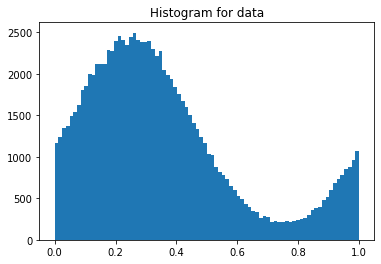

gaussian data mu= 0.25 Taylor expansion point= 0.0
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667']
min error: ['-0.2642410994', '-0.0803013667', '-0.0191092025', '-0.0045126127', '-0.0021743155']
max error: ['0.0000000000', '0.0015456392', '0.0017781437', '0.0018073127', '0.0022234549']
avg error: ['-0.0619901754', '-0.0121463798', '-0.0021217999', '-0.0002941944', '-0.0000765598']
rms error: ['0.0925558880', '0.0233024396', '0.0049167010', '0.0011620240', '0.0009145369']

gaussian data mu= 0.25 Taylor expansion point= 0.25
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667']
min error: ['-0.1722712368', '-0.0400645547', '-0.0070128846', '-0.0025743698', '-0.0025743698']
max error: ['0.0021473581', '0.0077213040', '0.0043279962', '0.0045673698', '0.0043279962']
avg error: ['-0.0259348992', '-0.0029493070', '0.0001714639', '0.0007417523', '0.0007282411']
rms error: ['0.0505836941', '0.0101365978', '0.0019

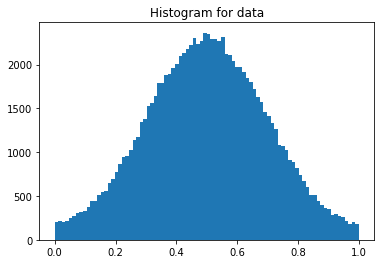

gaussian data mu= 0.5 Taylor expansion point= 0.0
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667']
min error: ['-0.2642410994', '-0.0803013667', '-0.0191092025', '-0.0045126127', '-0.0021743155']
max error: ['0.0000000000', '0.0015456392', '0.0017781437', '0.0018073127', '0.0022234549']
avg error: ['-0.0962673426', '-0.0186304618', '-0.0028514559', '-0.0002948158', '-0.0000659931']
rms error: ['0.1118652970', '0.0245855786', '0.0044281599', '0.0010260444', '0.0008683119']

gaussian data mu= 0.5 Taylor expansion point= 0.25
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667']
min error: ['-0.1722712368', '-0.0400645547', '-0.0070128846', '-0.0025743698']
max error: ['0.0021473581', '0.0077213040', '0.0043279962', '0.0045673698']
avg error: ['-0.0371911265', '-0.0043012374', '0.0002426727', '0.0008402499']
rms error: ['0.0524378568', '0.0085347081', '0.0015940421', '0.0014442402']

gaussian data mu= 0.5 Taylor expansion po

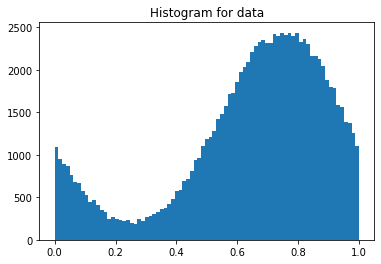

gaussian data mu= 0.75 Taylor expansion point= 0.0
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667']
min error: ['-0.2642410994', '-0.0803013667', '-0.0191092025', '-0.0045126127', '-0.0021743155']
max error: ['0.0000000000', '0.0015456392', '0.0017781437', '0.0018073127', '0.0022234549']
avg error: ['-0.1451647878', '-0.0344329253', '-0.0063547716', '-0.0008671801', '-0.0002597894']
rms error: ['0.1616413742', '0.0407267585', '0.0080959108', '0.0014324810', '0.0008957774']

gaussian data mu= 0.75 Taylor expansion point= 0.25
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667']
min error: ['-0.1722712368', '-0.0400645547', '-0.0070128846', '-0.0025743698']
max error: ['0.0021473581', '0.0077213040', '0.0043279962', '0.0045673698']
avg error: ['-0.0756603628', '-0.0120193725', '-0.0008822676', '0.0007809682']
rms error: ['0.0890647173', '0.0164996069', '0.0022803876', '0.0013724435']

gaussian data mu= 0.75 Taylor expansio

In [3]:
point_search(func="exp", uniform=False, fxp=True, intwidth=7, fracwidth=8, 
             valid=True, rounding_coeff="round", rounding_var="round", keepwidth=True)

### flp guassian

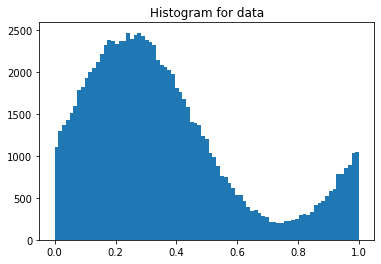

gaussian data mu= 0.25 Taylor expansion point= 0.0
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889', '0.0001984127']
min error: ['-0.2642410994', '-0.0803013667', '-0.0189880971', '-0.0036597580', '-0.0005940550', '-0.0000831484', '-0.0000101743', '-0.0000010691']
max error: ['0.0000000000', '0.0000000000', '0.0000000000', '0.0000001151', '0.0000001151', '0.0000001151', '0.0000001151', '0.0000001452']
avg error: ['-0.0619835369', '-0.0121160550', '-0.0021287506', '-0.0003346681', '-0.0000468945', '-0.0000058655', '-0.0000006613', '-0.0000000714']
rms error: ['0.0926468745', '0.0233299769', '0.0049427785', '0.0008813328', '0.0001343987', '0.0000178364', '0.0000020890', '0.0000002210']

gaussian data mu= 0.25 Taylor expansion point= 0.25
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889', '0.0001984127']
min error: ['-0.1733584702', '-0.0405053

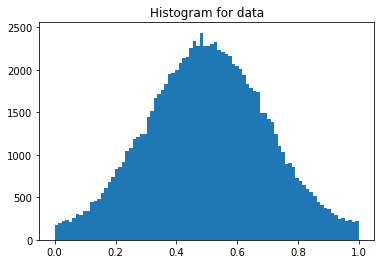

gaussian data mu= 0.5 Taylor expansion point= 0.0
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889', '0.0001984127']
min error: ['-0.2642410994', '-0.0803013667', '-0.0189880971', '-0.0036597580', '-0.0005940550', '-0.0000831484', '-0.0000101743', '-0.0000010691']
max error: ['0.0000000000', '0.0000000000', '0.0000000000', '0.0000001151', '0.0000001151', '0.0000001151', '0.0000001151', '0.0000001452']
avg error: ['-0.0964282602', '-0.0186372381', '-0.0029637213', '-0.0004041426', '-0.0000485165', '-0.0000052195', '-0.0000005125', '-0.0000000510']
rms error: ['0.1120389774', '0.0246380121', '0.0045161759', '0.0007120373', '0.0000984684', '0.0000121062', '0.0000013356', '0.0000001439']

gaussian data mu= 0.5 Taylor expansion point= 0.25
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889', '0.0001984127']
min error: ['-0.1733584702', '-0.040505379

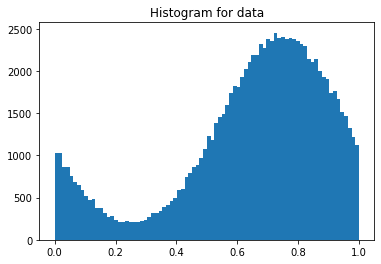

gaussian data mu= 0.75 Taylor expansion point= 0.0
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889', '0.0001984127']
min error: ['-0.2642410994', '-0.0803013667', '-0.0189880971', '-0.0036597580', '-0.0005940550', '-0.0000831484', '-0.0000101743', '-0.0000010691']
max error: ['0.0000000000', '0.0000000000', '0.0000000000', '0.0000001151', '0.0000001151', '0.0000001151', '0.0000001151', '0.0000001452']
avg error: ['-0.1451096982', '-0.0344131216', '-0.0065164976', '-0.0010296367', '-0.0001398696', '-0.0000166820', '-0.0000017711', '-0.0000001656']
rms error: ['0.1616465598', '0.0407640487', '0.0082529066', '0.0013966806', '0.0002030457', '0.0000258560', '0.0000029210', '0.0000002958']

gaussian data mu= 0.75 Taylor expansion point= 0.25
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889', '0.0001984127']
min error: ['-0.1733584702', '-0.0405053

In [4]:
point_search(func="exp", uniform=False, fxp=False, intwidth=7, fracwidth=8, 
             valid=True, rounding_coeff="round", rounding_var="round", keepwidth=True)

### fxp uniform

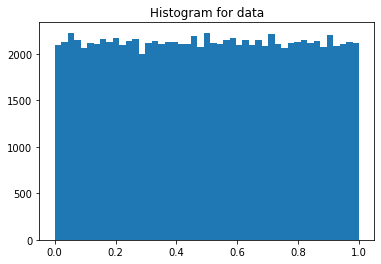

gaussian data mu= 0.5 Taylor expansion point= 0.0
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667']
min error: ['-0.2642410994', '-0.0803013667', '-0.0191092025', '-0.0045126127', '-0.0021743155']
max error: ['0.0000000000', '0.0015456392', '0.0017781437', '0.0018073127', '0.0022234549']
avg error: ['-0.1036196500', '-0.0233613625', '-0.0042648879', '-0.0005826807', '-0.0001604343']
rms error: ['0.1320160627', '0.0333850831', '0.0067674648', '0.0013164879', '0.0009079226']

gaussian data mu= 0.5 Taylor expansion point= 0.25
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667']
min error: ['-0.1722712368', '-0.0400645547', '-0.0070128846', '-0.0025743698']
max error: ['0.0021473581', '0.0077213040', '0.0043279962', '0.0045673698']
avg error: ['-0.0511163734', '-0.0075212610', '-0.0003564870', '0.0007680327']
rms error: ['0.0728537589', '0.0138713447', '0.0021828080', '0.0014641309']

gaussian data mu= 0.5 Taylor expansion p

In [5]:
point_search(func="exp", uniform=True, fxp=True, intwidth=7, fracwidth=8, 
             valid=True, rounding_coeff="round", rounding_var="round", keepwidth=True)

### flp uniform

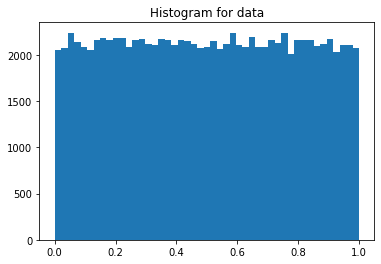

gaussian data mu= 0.5 Taylor expansion point= 0.0
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889', '0.0001984127']
min error: ['-0.2642410994', '-0.0803013667', '-0.0189880971', '-0.0036597580', '-0.0005940550', '-0.0000831484', '-0.0000101743', '-0.0000010691']
max error: ['0.0000000000', '0.0000000000', '0.0000000000', '0.0000001151', '0.0000001151', '0.0000001151', '0.0000001151', '0.0000001452']
avg error: ['-0.1033727899', '-0.0232466795', '-0.0043269438', '-0.0006847144', '-0.0000940584', '-0.0000113994', '-0.0000012348', '-0.0000001209']
rms error: ['0.1317452639', '0.0332989767', '0.0068455064', '0.0011797454', '0.0001745602', '0.0000225895', '0.0000025901', '0.0000002670']

gaussian data mu= 0.5 Taylor expansion point= 0.25
eff coeff: ['1.0000000000', '1.0000000000', '0.5000000000', '0.1666666667', '0.0416666667', '0.0083333333', '0.0013888889', '0.0001984127']
min error: ['-0.1733584702', '-0.040505379

In [6]:
point_search(func="exp", uniform=True, fxp=False, intwidth=7, fracwidth=8, 
             valid=True, rounding_coeff="round", rounding_var="round", keepwidth=True)

## test div

### fxp guassian

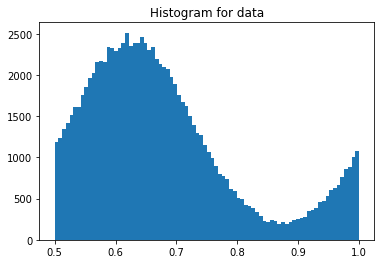

gaussian data mu= 0.625 Taylor expansion point= 1.0
eff coeff: ['1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000']
min error: ['-0.2500000000', '-0.1250000000', '-0.0625000000', '-0.0312500000', '-0.0156250000', '-0.0078125000', '-0.0039062500', '-0.0019531697']
max error: ['0.0000000000', '0.0015259349', '0.0015259349', '0.0015259349', '0.0015259349', '0.0015259349', '0.0015259349', '0.0015259349']
avg error: ['-0.1191102564', '-0.0462520793', '-0.0185845587', '-0.0077433959', '-0.0033038037', '-0.0014891771', '-0.0008818785', '-0.0006834849']
rms error: ['0.1365296841', '0.0569820814', '0.0246529207', '0.0109920427', '0.0050138035', '0.0023162970', '0.0013293445', '0.0010387274']



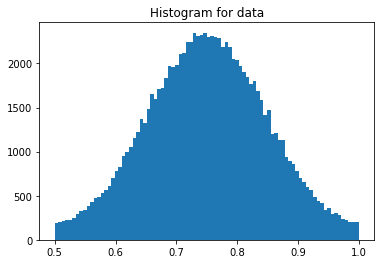

gaussian data mu= 0.75 Taylor expansion point= 1.0
eff coeff: ['1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000']
min error: ['-0.2500000000', '-0.1250000000', '-0.0625000000', '-0.0312500000', '-0.0156250000', '-0.0078125000', '-0.0039062500', '-0.0019531697']
max error: ['0.0000000000', '0.0015259349', '0.0015259349', '0.0015259349', '0.0015259349', '0.0015259349', '0.0015259349', '0.0015259349']
avg error: ['-0.0720321015', '-0.0226015057', '-0.0076884916', '-0.0028315708', '-0.0011862849', '-0.0006768989', '-0.0005481048', '-0.0005137061']
rms error: ['0.0879345238', '0.0321872160', '0.0127318623', '0.0054064542', '0.0024632916', '0.0013369896', '0.0010496849', '0.0009913775']



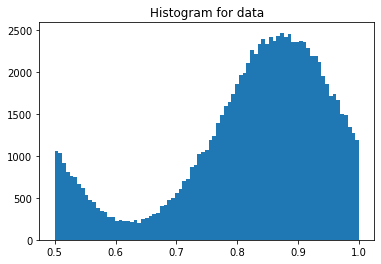

gaussian data mu= 0.875 Taylor expansion point= 1.0
eff coeff: ['1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000']
min error: ['-0.2500000000', '-0.1250000000', '-0.0625000000', '-0.0312500000', '-0.0156250000', '-0.0078125000', '-0.0039062500', '-0.0019531697']
max error: ['0.0000000000', '0.0015259349', '0.0015259349', '0.0015259349', '0.0015259349', '0.0015259349', '0.0015259349', '0.0015259349']
avg error: ['-0.0471193194', '-0.0157288462', '-0.0062297620', '-0.0027750323', '-0.0014084885', '-0.0008215915', '-0.0005717851', '-0.0004571026']
rms error: ['0.0782048926', '0.0336207896', '0.0153729971', '0.0072255977', '0.0035051510', '0.0018296321', '0.0012121374', '0.0010372235']



In [7]:
point_search(func="div", uniform=False, fxp=True, intwidth=7, fracwidth=8, 
             valid=True, rounding_coeff="round", rounding_var="round", keepwidth=True)

### flp guassian

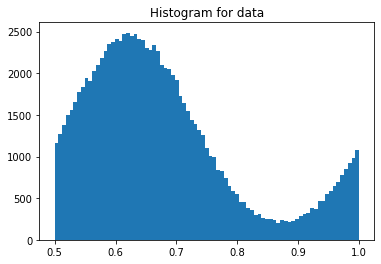

gaussian data mu= 0.625 Taylor expansion point= 1.0
eff coeff: ['1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000']
min error: ['-0.2500000000', '-0.1250000000', '-0.0625000000', '-0.0312500000', '-0.0156250000', '-0.0078125000', '-0.0039062500', '-0.0019531250']
max error: ['0.0000000000', '0.0000000000', '0.0000000000', '0.0000001159', '0.0000001159', '0.0000001159', '0.0000001159', '0.0000001159']
avg error: ['-0.1194003224', '-0.0464976802', '-0.0187276918', '-0.0077421991', '-0.0032690628', '-0.0014046971', '-0.0006125136', '-0.0002704307']
rms error: ['0.1368489861', '0.0571757630', '0.0247490332', '0.0109852748', '0.0049670413', '0.0022776183', '0.0010558589', '0.0004937400']



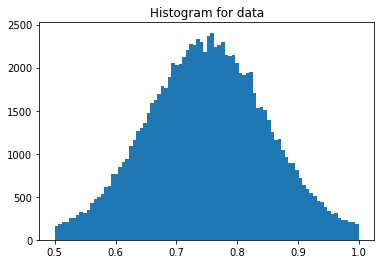

gaussian data mu= 0.75 Taylor expansion point= 1.0
eff coeff: ['1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000']
min error: ['-0.2500000000', '-0.1250000000', '-0.0625000000', '-0.0312500000', '-0.0156250000', '-0.0078125000', '-0.0039062500', '-0.0019531250']
max error: ['0.0000000000', '0.0000000000', '0.0000000000', '0.0000001159', '0.0000001159', '0.0000001159', '0.0000001159', '0.0000001159']
avg error: ['-0.0719331354', '-0.0227429755', '-0.0077122585', '-0.0027642713', '-0.0010363333', '-0.0004031587', '-0.0001617180', '-0.0000665558']
rms error: ['0.0878194571', '0.0321921743', '0.0127169704', '0.0052903844', '0.0022831727', '0.0010119169', '0.0004574028', '0.0002098504']



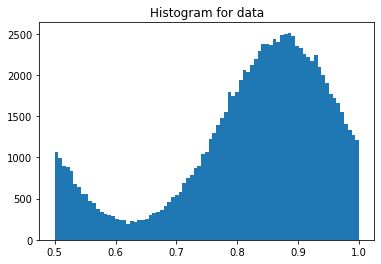

gaussian data mu= 0.875 Taylor expansion point= 1.0
eff coeff: ['1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000']
min error: ['-0.2500000000', '-0.1250000000', '-0.0625000000', '-0.0312500000', '-0.0156250000', '-0.0078125000', '-0.0039062500', '-0.0019531250']
max error: ['0.0000000000', '0.0000000000', '0.0000000000', '0.0000001159', '0.0000001159', '0.0000001159', '0.0000001159', '0.0000001159']
avg error: ['-0.0470340475', '-0.0157799032', '-0.0061059226', '-0.0025636093', '-0.0011275512', '-0.0005096517', '-0.0002342786', '-0.0001088996']
rms error: ['0.0781404227', '0.0335790031', '0.0153060239', '0.0071419142', '0.0033720320', '0.0016037261', '0.0007666624', '0.0003679601']



In [8]:
point_search(func="div", uniform=False, fxp=False, intwidth=7, fracwidth=8, 
             valid=True, rounding_coeff="round", rounding_var="round", keepwidth=True)

### fxp uniform

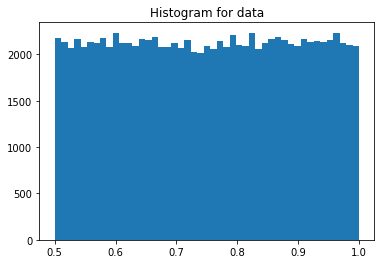

gaussian data mu= 0.5 Taylor expansion point= 1.0
eff coeff: ['1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000']
min error: ['-0.2500000000', '-0.1250000000', '-0.0625000000', '-0.0312500000', '-0.0156250000', '-0.0078125000', '-0.0039062500', '-0.0019531697']
max error: ['0.0000000000', '0.0015259349', '0.0015259349', '0.0015259349', '0.0015259349', '0.0015259349', '0.0015259349', '0.0015259349']
avg error: ['-0.0832996219', '-0.0311852340', '-0.0125479130', '-0.0053362194', '-0.0024032812', '-0.0011781212', '-0.0007370152', '-0.0005715907']
rms error: ['0.1118638813', '0.0472900830', '0.0208818652', '0.0094909770', '0.0044255573', '0.0021287710', '0.0012856157', '0.0010388211']



In [9]:
point_search(func="div", uniform=True, fxp=True, intwidth=7, fracwidth=8, 
             valid=True, rounding_coeff="round", rounding_var="round", keepwidth=True)

### flp uniform

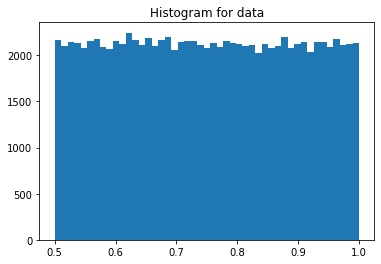

gaussian data mu= 0.5 Taylor expansion point= 1.0
eff coeff: ['1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000']
min error: ['-0.2500000000', '-0.1250000000', '-0.0625000000', '-0.0312500000', '-0.0156250000', '-0.0078125000', '-0.0039062500', '-0.0019531250']
max error: ['0.0000000000', '0.0000000000', '0.0000000000', '0.0000001159', '0.0000001159', '0.0000001159', '0.0000001159', '0.0000001159']
avg error: ['-0.0836428031', '-0.0313854329', '-0.0125567000', '-0.0052320203', '-0.0022422026', '-0.0009809281', '-0.0004359661', '-0.0001961936']
rms error: ['0.1120565832', '0.0473519303', '0.0208797473', '0.0094437664', '0.0043441225', '0.0020225137', '0.0009501682', '0.0004495271']



In [10]:
point_search(func="div", uniform=True, fxp=False, intwidth=7, fracwidth=8, 
             valid=True, rounding_coeff="round", rounding_var="round", keepwidth=True)

## test log

### fxp guassian

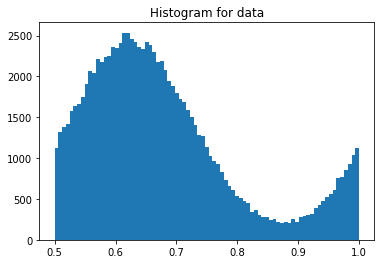

gaussian data mu= 0.625 Taylor expansion point= 0.5
eff coeff: ['0.6931471806', '2.0000000000', '2.0000000000', '2.6666666667', '4.0000000000', '6.4000000000', '10.6666666667', '18.2857142857']
min error: ['-77.8495101929', '-0.0027473923', '-34.9335479736', '-0.0033870686', '-21.9589576721', '-0.0049951603', '-15.9706840515', '-0.0064094882']
max error: ['-0.0025116347', '47.9042358398', '0.0032875452', '26.9452762604', '0.0037608473', '17.9628658295', '0.0046279477', '13.9706840515']
avg error: ['-1.7061320543', '0.9901136160', '-0.6854585409', '0.5143558383', '-0.4054985046', '0.3293458521', '-0.2862665653', '0.2418046892']
rms error: ['7.9940276146', '4.8997216225', '3.5405747890', '2.7217690945', '2.2011849880', '1.8019592762', '1.5954415798', '1.3816490173']

gaussian data mu= 0.625 Taylor expansion point= 0.625
eff coeff: ['0.4700036292', '1.6000000000', '1.2800000000', '1.3653333333', '1.6384000000', '2.0971520000', '2.7962026667']
min error: ['-32.9374580383', '-0.0049756025',

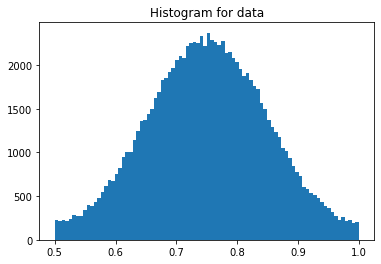

gaussian data mu= 0.75 Taylor expansion point= 0.5
eff coeff: ['0.6931471806', '2.0000000000', '2.0000000000', '2.6666666667', '4.0000000000', '6.4000000000', '10.6666666667', '18.2857142857']
min error: ['-77.8495101929', '-0.0027473923', '-34.9335479736', '-0.0033870686', '-21.9589576721', '-0.0049951603', '-15.9706840515', '-0.0064094882']
max error: ['-0.0025116347', '47.9042358398', '0.0032875452', '26.9452762604', '0.0037608473', '17.9628658295', '0.0046279477', '13.9706840515']
avg error: ['-0.8847008348', '0.4382885098', '-0.2658162713', '0.1799171418', '-0.1303616464', '0.0994462073', '-0.0820107162', '0.0663076043']
rms error: ['3.6937348843', '2.2413816452', '1.6067482233', '1.2295347452', '0.9905972481', '0.8099200130', '0.7152118683', '0.6177449226']

gaussian data mu= 0.75 Taylor expansion point= 0.625
eff coeff: ['0.4700036292', '1.6000000000', '1.2800000000', '1.3653333333', '1.6384000000', '2.0971520000', '2.7962026667']
min error: ['-32.9374580383', '-0.0049756025', '

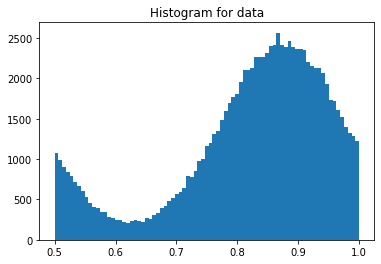

gaussian data mu= 0.875 Taylor expansion point= 0.5
eff coeff: ['0.6931471806', '2.0000000000', '2.0000000000', '2.6666666667', '4.0000000000', '6.4000000000', '10.6666666667', '18.2857142857']
min error: ['-77.8495101929', '-0.0027473923', '-34.9335479736', '-0.0033870686', '-21.9589576721', '-0.0049951603', '-15.9706840515', '-0.0064094882']
max error: ['-0.0025116347', '47.9042358398', '0.0032875452', '26.9452762604', '0.0037608473', '17.9628658295', '0.0046279477', '13.9706840515']
avg error: ['-3.0127961636', '1.6995470524', '-1.1316251755', '0.8184175491', '-0.6252855659', '0.4952987134', '-0.4192756116', '0.3466862440']
rms error: ['8.6092205048', '5.2505021095', '3.7726936340', '2.8909420967', '2.3300895691', '1.9060043097', '1.6834475994', '1.4531118870']

gaussian data mu= 0.875 Taylor expansion point= 0.625
eff coeff: ['0.4700036292', '1.6000000000', '1.2800000000', '1.3653333333', '1.6384000000', '2.0971520000', '2.7962026667']
min error: ['-32.9374580383', '-0.0049756025',

In [11]:
point_search(func="log", uniform=False, fxp=True, intwidth=7, fracwidth=8, 
             valid=True, rounding_coeff="round", rounding_var="round", keepwidth=True)

### flp guassian

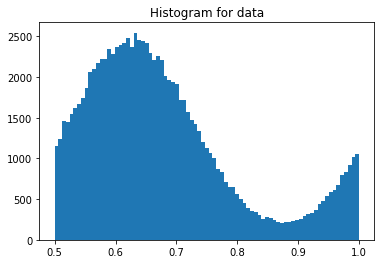

gaussian data mu= 0.625 Taylor expansion point= 0.5
eff coeff: ['0.6931471806', '2.0000000000', '2.0000000000', '2.6666666667', '4.0000000000', '6.4000000000', '10.6666666667', '18.2857142857']
min error: ['-77.4047012329', '-0.0000000000', '-34.8291854858', '-0.0000000000', '-22.0618782043', '-0.0000000000', '-15.9861488342', '-0.0000001074']
max error: ['-0.0000000000', '48.3568382263', '-0.0000000000', '27.0729103088', '0.0000000910', '18.5638923645', '0.0000000988', '14.0089540482']
avg error: ['-1.6470837593', '0.9641191363', '-0.6643071771', '0.4990430772', '-0.3952372968', '0.3243427873', '-0.2730412185', '0.2343175709']
rms error: ['7.7943758965', '4.8376712799', '3.4634423256', '2.6770997047', '2.1701474190', '1.8170448542', '1.5574299097', '1.3587638140']

gaussian data mu= 0.625 Taylor expansion point= 0.625
eff coeff: ['0.4700036292', '1.6000000000', '1.2800000000', '1.3653333333', '1.6384000000', '2.0971520000', '2.7962026667', '3.8347922286']
min error: ['-32.6171531677',

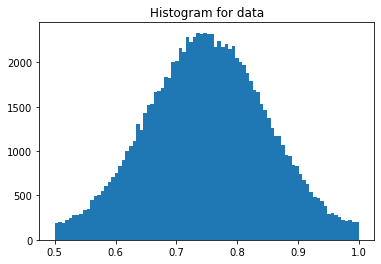

gaussian data mu= 0.75 Taylor expansion point= 0.5
eff coeff: ['0.6931471806', '2.0000000000', '2.0000000000', '2.6666666667', '4.0000000000', '6.4000000000', '10.6666666667', '18.2857142857']
min error: ['-77.4047012329', '-0.0000000000', '-34.8291854858', '-0.0000000000', '-22.0618782043', '-0.0000000000', '-15.9861488342', '-0.0000001074']
max error: ['-0.0000000000', '48.3568382263', '-0.0000000000', '27.0729103088', '0.0000000910', '18.5638923645', '0.0000000988', '14.0089540482']
avg error: ['-0.8680804968', '0.4340385199', '-0.2625709176', '0.1777454168', '-0.1295750290', '0.0995030701', '-0.0793852955', '0.0651971847']
rms error: ['3.6156675816', '2.2195217609', '1.5774923563', '1.2130339146', '0.9795005918', '0.8176199198', '0.6990597844', '0.6086238027']

gaussian data mu= 0.75 Taylor expansion point= 0.625
eff coeff: ['0.4700036292', '1.6000000000', '1.2800000000', '1.3653333333', '1.6384000000', '2.0971520000', '2.7962026667', '3.8347922286']
min error: ['-32.6171531677', '

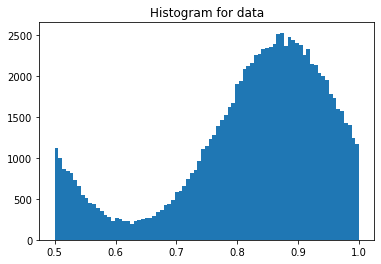

gaussian data mu= 0.875 Taylor expansion point= 0.5
eff coeff: ['0.6931471806', '2.0000000000', '2.0000000000', '2.6666666667', '4.0000000000', '6.4000000000', '10.6666666667', '18.2857142857']
min error: ['-77.4047012329', '-0.0000000000', '-34.8291854858', '-0.0000000000', '-22.0618782043', '-0.0000000000', '-15.9861488342', '-0.0000001074']
max error: ['-0.0000000000', '48.3568382263', '-0.0000000000', '27.0729103088', '0.0000000910', '18.5638923645', '0.0000000988', '14.0089540482']
avg error: ['-2.9818193913', '1.6953305006', '-1.1262787580', '0.8163514733', '-0.6257952452', '0.4988533556', '-0.4093270600', '0.3434191346']
rms error: ['8.5047330856', '5.2480568886', '3.7399160862', '2.8799874783', '2.3273851871', '1.9435968399', '1.6621645689', '1.4473097324']

gaussian data mu= 0.875 Taylor expansion point= 0.625
eff coeff: ['0.4700036292', '1.6000000000', '1.2800000000', '1.3653333333', '1.6384000000', '2.0971520000', '2.7962026667', '3.8347922286']
min error: ['-32.6171531677',

In [12]:
point_search(func="log", uniform=False, fxp=False, intwidth=7, fracwidth=8, 
             valid=True, rounding_coeff="round", rounding_var="round", keepwidth=True)

### fxp uniform

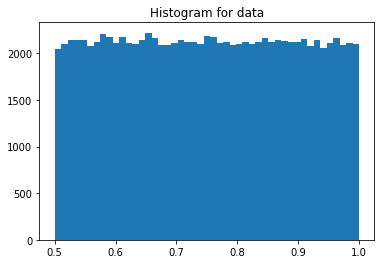

gaussian data mu= 0.5 Taylor expansion point= 0.5
eff coeff: ['0.6931471806', '2.0000000000', '2.0000000000', '2.6666666667', '4.0000000000', '6.4000000000', '10.6666666667', '18.2857142857']
min error: ['-77.8495101929', '-0.0027473923', '-34.9335479736', '-0.0033870686', '-21.9589576721', '-0.0049951603', '-15.9706840515', '-0.0064094882']
max error: ['-0.0025116347', '47.9042358398', '0.0032875452', '26.9452762604', '0.0037608473', '17.9628658295', '0.0046279477', '13.9706840515']
avg error: ['-2.4584391117', '1.4066325426', '-0.9535070062', '0.7011620402', '-0.5437804461', '0.4358546138', '-0.3734998405', '0.3121258318']
rms error: ['8.6232299805', '5.2731285095', '3.8006248474', '2.9170060158', '2.3558871746', '1.9278312922', '1.7048779726', '1.4747148752']

gaussian data mu= 0.5 Taylor expansion point= 0.625
eff coeff: ['0.4700036292', '1.6000000000', '1.2800000000', '1.3653333333', '1.6384000000', '2.0971520000', '2.7962026667']
min error: ['-32.9374580383', '-0.0049756025', '-4

In [13]:
point_search(func="log", uniform=True, fxp=True, intwidth=7, fracwidth=8, 
             valid=True, rounding_coeff="round", rounding_var="round", keepwidth=True)

### flp uniform

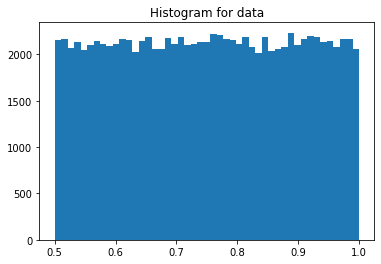

gaussian data mu= 0.5 Taylor expansion point= 0.5
eff coeff: ['0.6931471806', '2.0000000000', '2.0000000000', '2.6666666667', '4.0000000000', '6.4000000000', '10.6666666667', '18.2857142857']
min error: ['-77.4047012329', '-0.0000000000', '-34.8291854858', '-0.0000000000', '-22.0618782043', '-0.0000000000', '-15.9861488342', '-0.0000001074']
max error: ['-0.0000000000', '48.3568382263', '-0.0000000000', '27.0729103088', '0.0000000910', '18.5638923645', '0.0000000988', '14.0089540482']
avg error: ['-2.4074909687', '1.3876957893', '-0.9368224144', '0.6897271872', '-0.5363476276', '0.4330596030', '-0.3593965769', '0.3045720458']
rms error: ['8.3410520554', '5.1605830193', '3.6850912571', '2.8423378468', '2.2999329567', '1.9227133989', '1.6457600594', '1.4340975285']

gaussian data mu= 0.5 Taylor expansion point= 0.625
eff coeff: ['0.4700036292', '1.6000000000', '1.2800000000', '1.3653333333', '1.6384000000', '2.0971520000', '2.7962026667', '3.8347922286']
min error: ['-32.6171531677', '-0

In [14]:
point_search(func="log", uniform=True, fxp=False, intwidth=7, fracwidth=8, 
             valid=True, rounding_coeff="round", rounding_var="round", keepwidth=True)